BioPandas

Authors: 
- Sebastian Raschka <mail@sebastianraschka.com> 
- Arian Jamasb <arian@jamasb.io>  

License: BSD 3 clause  
Project Website: http://rasbt.github.io/biopandas/  
Code Repository: https://github.com/rasbt/biopandas  

In [3]:
%load_ext watermark
%watermark -d -u -p pandas,biopandas

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Last updated: 2023-01-04

pandas   : 1.3.5
biopandas: 0.5.0.dev0



In [4]:
from biopandas.mmtf import PandasMmtf
import pandas as pd
pd.set_option('display.width', 600)
pd.set_option('display.max_columns', 8)

# Working with PDB Structures in DataFrames

There are several ways to load an MMTF structure into a `PandasMmtf` object.


### 1 -- Loading a PDB file from the Protein Data Bank

MMTF files can be directly fetched from The Protein Data Bank at [http://www.rcsb.org](http://www.rcsb.org) via its unique 4-letter after initializing a new [`PandasMmtf`](../api/biopandas.mmtf#pandasmmtf) object and calling the [`fetch_mmtf`](../api/biopandas.mmtf#pandasmmtffetch_mmtf) method:

In [14]:
from biopandas.mmtf import PandasMmtf

# Initialize a new PandasPdb object
# and fetch the PDB file from rcsb.org
pmmtf = PandasMmtf().fetch_mmtf('3eiy')
pmmtf.df["ATOM"]

,record_name,residue_name,atom_name,element_symbol,...,residue_number,occupancy,chain_id,atom_number
0,ATOM,SER,N,N,...,1,1.0,A,1
1,ATOM,SER,CA,C,...,1,1.0,A,2
2,ATOM,SER,C,C,...,1,1.0,A,3
3,ATOM,SER,O,O,...,1,1.0,A,4
4,ATOM,SER,CB,C,...,1,1.0,A,5
...,...,...,...,...,...,...,...,...,...
1325,ATOM,LYS,CG,C,...,174,1.0,A,1326
1326,ATOM,LYS,CD,C,...,174,1.0,A,1327
1327,ATOM,LYS,CE,C,...,174,1.0,A,1328
1328,ATOM,LYS,NZ,N,...,174,1.0,A,1329


### 2 -- Loading a PDB structure from a local file


Alternatively, we can load MMTF files from local directories as regular MMTF files using [`read_mmtf`](../api/biopandas.mmtf#pandasmmtfread_mmtf):

In [15]:
pmmtf.read_mmtf('./data/3eiy.mmtf')

[File link: [3eiy.pdb](https://raw.githubusercontent.com/rasbt/biopandas/main/docs/tutorials/data/3eiy.mmtf)]

After the file was succesfully loaded, we have access to the following attributes:

In [19]:
print('PDB Code: %s' % pmmtf.code)
print('MMTF object: %s' % pmmtf.mmtf_path)
print('MMTF object: %s' % pmmtf.mmtf)

PDB Code: 3eiy
MMTF object: ./data/3eiy.mmtf
MMTF object: <mmtf.api.mmtf_reader.MMTFDecoder object at 0x7fc77eedbc90>


The raw MMTF object (parsed by [mmtf-python](https://pypi.org/project/mmtf-python/)) is available:

In [54]:
from rich import inspect

inspect(pmmtf.mmtf, )

╭────────────────────────────────── <class 'mmtf.api.mmtf_reader.MMTFDecoder'> ───────────────────────────────────╮
│ Class to decode raw mmtf data into a parsed data model that can be fed into other data model                    │
│                                                                                                                 │
│ ╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────╮ │
│ │ <mmtf.api.mmtf_reader.MMTFDecoder object at 0x7fc77ec4a490>                                                 │ │
│ ╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────╯ │
│                                                                                                                 │
│         alt_loc_list = [                                                                                        │
│                            '\x00',                                                                              │
│                            '\x00',                                                                              │
│                            '\x00',                                                                              │
│                            '\x00',                                                                              │
│                            '\x00',                                                                              │
│                            '\x00',                                                                              │
│                            '\x00',                                                                              │
│                            '\x00',                                                                              │
│                            '\x00',                                                                              │
│                            '\x00',                                                                              │
│                            '\x00',                                                                              │
│                            '\x00',                                                                              │
│                            '\x00',                                                                              │
│                            '\x00',                                                                              │
│                            '\x00',                                                                              │
│                            '\x00',                                                                              │
│                            '\x00',                                                                              │
│                            '\x00',                                                                              │
│                            '\x00',                                                                              │
│                            '\x00',                                                                              │
│                            '\x00',                                                                              │
│                            '\x00',                                                                              │
│                            '\x00',                                                                              │
│                            '\x00',                                                                              │
│                            '\x00',                                                                              │
│                            '\x00',                                                                              │
│                            '\x00',                    

The most interesting / useful attribute is the [`PandasMmtf.df`](../api/biopandas.mmtf#pandasmmtfdf) DataFrame dictionary though, which gives us access to the PDB files as pandas DataFrames. Let's print the first 3 lines from the `ATOM` coordinate section to see how it looks like:

In [20]:
pmmtf.df['ATOM'].head(3)

,record_name,residue_name,atom_name,element_symbol,...,residue_number,occupancy,chain_id,atom_number
0,ATOM,SER,N,N,...,1,1.0,A,1
1,ATOM,SER,CA,C,...,1,1.0,A,2
2,ATOM,SER,C,C,...,1,1.0,A,3


Ah, another interesting thing to mention is that the columns already come with the types you'd expect (where `object` essentially "means" `str` here):

In [41]:
pmmtf.df['ATOM'].dtypes

record_name        object
residue_name       object
atom_name          object
element_symbol     object
charge              int64
x_coord           float64
y_coord           float64
z_coord           float64
alt_loc            object
b_factor          float64
insertion          object
residue_number      int64
occupancy         float64
chain_id           object
atom_number         int64
dtype: object

## Why use MMTF?

From the [horse's mouth](https://mmtf.rcsb.org/):

### Small
The MMTF format reduces your bandwidth needs and allows in memory management of large structure. This enables you to overcome the I/O bottlenecks in structural bioinformatics analysis.

**The entire PDB archive (~121,000 structures) can be stored in less than 7GB. Meaning it can fit into RAM on a Desktop machine.**

### Fast
MMTF uses a compressed binary format. This allows efficient parsing of and access to structural data. You concentrate your efforts on analysis.

*The viral capsid (PDB code: 3J3Q) can be loaded and parsed in seconds in a web-browser.*

### Useful
Simple, well documented APIs to the data are provided. Further, the format is extensible and contains the information required to understand the structure (e.g., secondary structure and bonding information).

So, let's test it!

### Fetching from the PDB

#### MMTF

In [74]:
%%timeit
p = PandasMmtf().fetch_mmtf('3eiy')

515 ms ± 83.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### PDB

In [76]:
from biopandas.pdb import PandasPdb

In [77]:
%%timeit
p = PandasPdb().fetch_pdb('3eiy')

862 ms ± 157 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Fetching from Disk

#### MMTF

In [81]:
%%timeit
p = PandasMmtf().read_mmtf('./data/3eiy.mmtf')


4.24 ms ± 21.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


#### PDB

In [82]:
%%timeit
p = PandasPdb().read_pdb('./data/3eiy.pdb')

19.4 ms ± 171 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Working with MMTF DataFrames

In [43]:
from biopandas.mmtf import PandasMmtf
pmmtf = PandasMmtf()
pmmtf.read_mmtf('./data/3eiy.mmtf')
pmmtf.df["ATOM"].head()

,record_name,residue_name,atom_name,element_symbol,...,residue_number,occupancy,chain_id,atom_number
0,ATOM,SER,N,N,...,1,1.0,A,1
1,ATOM,SER,CA,C,...,1,1.0,A,2
2,ATOM,SER,C,C,...,1,1.0,A,3
3,ATOM,SER,O,O,...,1,1.0,A,4
4,ATOM,SER,CB,C,...,1,1.0,A,5


Okay, there's actually not *that* much to say ...   
Once we have our PDB file in the DataFrame format, we have the whole convenience of [pandas](http://pandas.pydata.org) right there at our fingertips.

For example, let's get all Proline residues:

In [44]:
pmmtf.df['ATOM'][pmmtf.df['ATOM']['residue_name'] == 'PRO'].head()

,record_name,residue_name,atom_name,element_symbol,...,residue_number,occupancy,chain_id,atom_number
38,ATOM,PRO,N,N,...,6,1.0,A,39
39,ATOM,PRO,CA,C,...,6,1.0,A,40
40,ATOM,PRO,C,C,...,6,1.0,A,41
41,ATOM,PRO,O,O,...,6,1.0,A,42
42,ATOM,PRO,CB,C,...,6,1.0,A,43


In [45]:
pmmtf.df['ATOM'][pmmtf.df['ATOM']['atom_name'] == 'C'].head()

,record_name,residue_name,atom_name,element_symbol,...,residue_number,occupancy,chain_id,atom_number
2,ATOM,SER,C,C,...,1,1.0,A,3
8,ATOM,PHE,C,C,...,2,1.0,A,9
19,ATOM,SER,C,C,...,3,1.0,A,20
25,ATOM,ASN,C,C,...,4,1.0,A,26
33,ATOM,VAL,C,C,...,5,1.0,A,34


In [47]:
pmmtf.df['ATOM'][pmmtf.df['ATOM']['element_symbol'] != 'H'].head()

,record_name,residue_name,atom_name,element_symbol,...,residue_number,occupancy,chain_id,atom_number
0,ATOM,SER,N,N,...,1,1.0,A,1
1,ATOM,SER,CA,C,...,1,1.0,A,2
2,ATOM,SER,C,C,...,1,1.0,A,3
3,ATOM,SER,O,O,...,1,1.0,A,4
4,ATOM,SER,CB,C,...,1,1.0,A,5


It's also easy to strip our coordinate section from hydrogen atoms if there are any ...

Or, let's compute the average temperature factor of our protein main chain:

In [49]:
mainchain = pmmtf.df['ATOM'][(pmmtf.df['ATOM']['atom_name'] == 'C') | 
                            (pmmtf.df['ATOM']['atom_name'] == 'O') | 
                            (pmmtf.df['ATOM']['atom_name'] == 'N') | 
                            (pmmtf.df['ATOM']['atom_name'] == 'CA')]

bfact_mc_avg = mainchain['b_factor'].mean()
print('Average B-Factor [Main Chain]: %.2f' % bfact_mc_avg)

Average B-Factor [Main Chain]: 28.83


## Plotting

Since we are using pandas under the hood, which in turns uses matplotlib under the hood, we can produce quick summary plots of our PDB structures relatively conveniently:

In [55]:
from biopandas.mmtf import PandasMmtf
pmmtf = PandasMmtf().read_mmtf('./data/3eiy.mmtf')

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

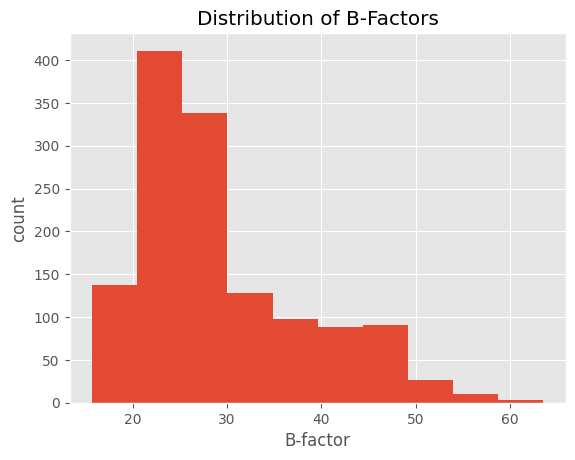

In [59]:
pmmtf.df['ATOM']['b_factor'].plot(kind='hist')
plt.title('Distribution of B-Factors')
plt.xlabel('B-factor')
plt.ylabel('count')
plt.show()

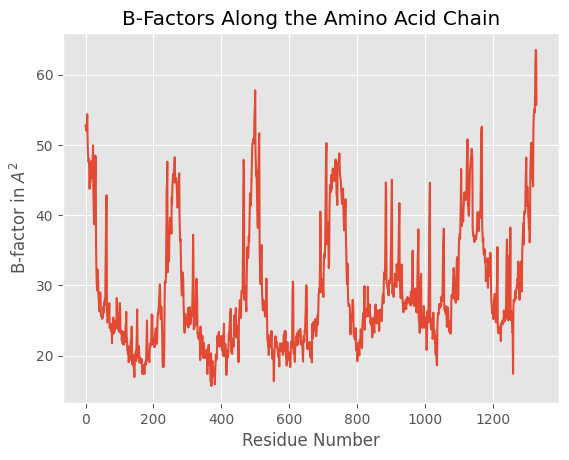

In [61]:
pmmtf.df['ATOM']['b_factor'].plot(kind='line')
plt.title('B-Factors Along the Amino Acid Chain')
plt.xlabel('Residue Number')
plt.ylabel('B-factor in $A^2$')
plt.show()

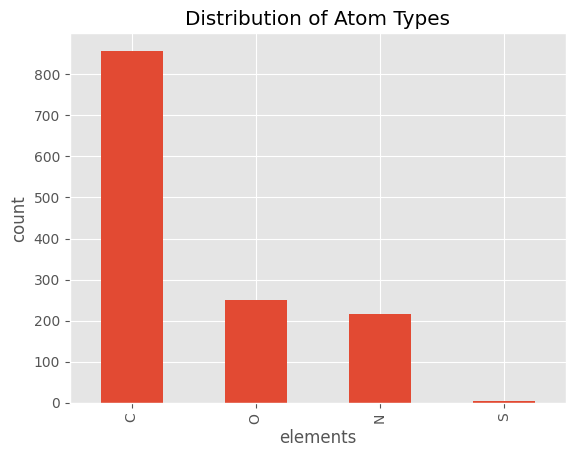

In [62]:
pmmtf.df['ATOM']['element_symbol'].value_counts().plot(kind='bar')
plt.title('Distribution of Atom Types')
plt.xlabel('elements')
plt.ylabel('count')
plt.show()

## Computing the Root Mean Square Deviation

BioPandas also comes with certain convenience functions, for example, ...

The Root-mean-square deviation (RMSD) is simply a measure of the average distance between atoms of 2 protein or ligand structures. This calculation of the Cartesian error follows the equation:

$$
RMSD(a, b) = \sqrt{\frac{1}{n} \sum^{n}_{i=1} \big((a_{ix})^2 + (a_{iy})^2 + (a_{iz})^2 \big)}
= \sqrt{\frac{1}{n} \sum^{n}_{i=1} || a_i + b_i||_2^2}
$$

We can compute the RMSD between 2 related protein structures:

![](./img/1t48_rmsd.png)

The hydrogen-free RMSD:

In [63]:
p_1 = PandasMmtf().read_mmtf('./data/1t48.mmtf')
p_2 = PandasMmtf().read_mmtf('./data/1t49.mmtf')

# Select first 995 atoms
p_1.df["ATOM"] = p_1.df["ATOM"].loc[p_1.df["ATOM"].atom_number <= 995]
p_2.df["ATOM"] = p_2.df["ATOM"].loc[p_2.df["ATOM"].atom_number <= 995]

r = PandasMmtf.rmsd(p_1.df['ATOM'], p_2.df['ATOM'], s='heavy')
print('RMSD: %.4f Angstrom' % r)

RMSD: 0.7377 Angstrom


In [64]:
p_1 = PandasMmtf().read_mmtf('./data/1t48.mmtf')
p_2 = PandasMmtf().read_mmtf('./data/1t49.mmtf')

# Select first 995 atoms
p_1.df["ATOM"] = p_1.df["ATOM"].loc[p_1.df["ATOM"].atom_number <= 995]
p_2.df["ATOM"] = p_2.df["ATOM"].loc[p_2.df["ATOM"].atom_number <= 995]

r = PandasMmtf.rmsd(p_1.df['ATOM'], p_2.df['ATOM'], s='main chain')
print('RMSD: %.4f Angstrom' % r)

RMSD: 0.4781 Angstrom


## Filtering MMTFs by Distance

We can use the `distance` method to compute the distance between each atom (or a subset of atoms) in our data frame and a three-dimensional reference point. For example:

In [65]:
p_1 = PandasMmtf().read_mmtf('./data/3eiy.mmtf')

reference_point = (9.362, 41.410, 10.542)
distances = p_1.distance(xyz=reference_point, records=('ATOM',))

The distance method returns a Pandas Series object:

In [66]:
distances.head()

0    19.267419
1    18.306060
2    16.976934
3    16.902897
4    18.124171
dtype: float64

And we can use this `Series` object, for instance, to select certain atoms in our DataFrame that fall within a desired distance threshold. For example, let's select all atoms that are within 7A of our reference point: 

In [67]:
all_within_7A = p_1.df['ATOM'][distances < 7.0]
all_within_7A.tail()

,record_name,residue_name,atom_name,element_symbol,...,residue_number,occupancy,chain_id,atom_number
786,ATOM,LEU,CB,C,...,105,1.0,A,787
787,ATOM,LEU,CG,C,...,105,1.0,A,788
788,ATOM,LEU,CD1,C,...,105,1.0,A,789
789,ATOM,LEU,CD2,C,...,105,1.0,A,790
790,ATOM,VAL,N,N,...,106,1.0,A,791


Visualized in PyMOL, this subset (yellow surface) would look as follows:
    
![](./img/3eiy_7a.png)

## Converting Amino Acid codes from 3- to 1-letter codes

Residues in the `residue_name` field can be converted into 1-letter amino acid codes, which may be useful for further sequence analysis, for example, pair-wise or multiple sequence alignments:

In [69]:
from biopandas.mmtf import PandasMmtf
pmmtf = PandasMmtf().fetch_mmtf('5mtn')
sequence = pmmtf.amino3to1()
sequence.tail()

,chain_id,residue_name
1378,B,I
1386,B,N
1394,B,Y
1406,B,R
1417,B,T


As shown above, the `amino3to1` method returns a `DataFrame` containing the `chain_id` and `residue_name` of the translated 1-letter amino acids. If you like to work with the sequence as a Python list of string characters, you could do the following:

In [70]:
sequence_list = list(sequence.loc[sequence['chain_id'] == 'A', 'residue_name'])
sequence_list[-5:] # last 5 residues of chain A

['V', 'R', 'H', 'Y', 'T']

And if you prefer to work with the sequence as a string, you can use the `join` method: 

In [71]:
''.join(sequence.loc[sequence['chain_id'] == 'A', 'residue_name'])

'SLEPEPWFFKNLSRKDAERQLLAPGNTHGSFLIRESESTAGSFSLSVRDFDQGEVVKHYKIRNLDNGGFYISPRITFPGLHELVRHYT'

To iterate over the sequences of multi-chain proteins, you can use the `unique` method as shown below:

In [72]:
for chain_id in sequence['chain_id'].unique():
    print('\nChain ID: %s' % chain_id)
    print(''.join(sequence.loc[sequence['chain_id'] == chain_id, 'residue_name']))


Chain ID: A
SLEPEPWFFKNLSRKDAERQLLAPGNTHGSFLIRESESTAGSFSLSVRDFDQGEVVKHYKIRNLDNGGFYISPRITFPGLHELVRHYT

Chain ID: B
SVSSVPTKLEVVAATPTSLLISWDAPAVTVVYYLITYGETGSPWPGGQAFEVPGSKSTATISGLKPGVDYTITVYAHRSSYGYSENPISINYRT
